## Texas Wind Turbine Dataset

### Problem Statement

The challenge faced by grid operators lies in the intermittent nature and limited control over wind conditions, presenting a common issue in integrating renewable energy sources to meet current demand. Predicting demand and balancing it with the supply requires not only forecasting electricity demand but also anticipating the availability of wind and solar generation plants in the coming hours, days, or weeks. Incorrect scheduling of wind generation plants can result in unnecessary reservations, elevated costs transferred to consumers, and increased reliance on more expensive and environmentally harmful power resources. Real-world data introduces challenges such as noise and missing periods, making accurate predictions more difficult.

### Dataset Details

The provided dataset comprises a full-year hourly time-series simulated using the National Renewable Energy Laboratory (NREL) software. Simulations were conducted for a location in Texas, US, ensuring perfect data completeness without noise—a common impediment in forecasting tasks with actual datasets. The dataset encompasses various weather features that can be analyzed and utilized as predictors for power generation.

### Columns

1. **Time stamp**
2. **System power generated (kW)**
3. **Wind speed (m/s)**
4. **Wind direction (deg)**
5. **Pressure (atm)**
6. **Air temperature ('C)**

The dataset offers a comprehensive set of features for studying and understanding the dynamics of wind power generation in Texas. Its perfect data completeness allows for robust analysis and modeling to address the challenges associated with predicting renewable energy availability.

In [1]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("Solarize_Light2")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px
import datetime as dt

In [2]:
#Importing the dataset
df =pd.read_csv("C:/Users/Rahul Nain/OneDrive/Desktop/Personal/Data Scinece Related Info/PROJECTS FOR CV/Texas Wind - Turbine - Accuracy =99 %/TexasTurbine.csv")


# look the data set
df.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [3]:
# looking the shape DataSet
df.shape

(8760, 6)

In [4]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time stamp                     8760 non-null   object 
 1   System power generated | (kW)  8760 non-null   float64
 2   Wind speed | (m/s)             8760 non-null   float64
 3   Wind direction | (deg)         8760 non-null   int64  
 4   Pressure | (atm)               8760 non-null   float64
 5   Air temperature | ('C)         8760 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


# Data Description

The dataset consists of 8,760 rows and 6 columns. Here is a detailed description of each column:

1. **Time stamp:** The timestamp column contains non-null values for all 8,760 entries. However, it is currently of object data type, suggesting it may need conversion to a more suitable datetime format for time-series analysis.

2. **System power generated (kW):** This column represents the system power generated in kilowatts and contains non-null float64 values across all 8,760 entries. It indicates the amount of power generated by the wind turbine system.

3. **Wind speed (m/s):** The wind speed column contains non-null float64 values for all 8,760 entries. It denotes the speed of the wind in meters per second, providing crucial information for understanding the environmental conditions affecting power generation.

4. **Wind direction (deg):** This column, with non-null int64 values for all 8,760 entries, represents the wind direction in degrees. Understanding wind direction is vital for comprehending the wind turbine's efficiency in converting wind energy into electrical power.

5. **Pressure (atm):** The pressure column consists of non-null float64 values across all 8,760 entries. It indicates atmospheric pressure in atmospheres, contributing to the overall understanding of environmental conditions affecting wind power generation.

6. **Air temperature ('C):** The air temperature column contains non-null float64 values for all 8,760 entries. It represents the temperature in degrees Celsius, providing insight into the thermal aspects influencing wind turbine performance.

The dataset appears to be well-prepared, containing no null values and consistent data types. However, it is recommended to convert the 'Time stamp' column to a datetime format for more effective time-series analysis. Additionally, further exploratory data analysis and visualization can uncover patterns and relationships within the dataset, facilitating a better understanding of the dynamics of wind power generation in the given location.


- We need convert data type column Timestamp from object to datet

In [5]:
# convert data type column Timestamp from object to datetime

df['Time stamp'] = pd.to_datetime(df['Time stamp'], format='%b %d, %I:%M %p').dt.strftime('%b %d %H:%M:%S.%f')
# then use a lambda function to convert to datetime if it is a string else make is Not a Time
df['Time stamp'] = df['Time stamp'].apply(lambda x: dt.datetime.strptime(x,'%b %d %H:%M:%S.%f') if type(x)==str else pd.NaT)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Time stamp                     8760 non-null   datetime64[ns]
 1   System power generated | (kW)  8760 non-null   float64       
 2   Wind speed | (m/s)             8760 non-null   float64       
 3   Wind direction | (deg)         8760 non-null   int64         
 4   Pressure | (atm)               8760 non-null   float64       
 5   Air temperature | ('C)         8760 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 410.8 KB


In [7]:
# missing value

df.isnull().sum()

Time stamp                       0
System power generated | (kW)    0
Wind speed | (m/s)               0
Wind direction | (deg)           0
Pressure | (atm)                 0
Air temperature | ('C)           0
dtype: int64

In [8]:
# check if any duplicate value

df.duplicated().sum()

0

In [9]:
# look  describe data set
df.describe().round(2)

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
count,8760.00,8760.00,8760.00,8760.00,8760.00
mean,964.47,7.38,146.62,0.99,22.15
std,878.56,3.14,84.68,0.01,4.86
min,0.00,0.12,0.00,0.97,3.26
25%,215.95,5.12,99.00,0.99,19.46
50%,693.97,7.34,135.00,0.99,22.76
75%,1562.29,9.60,169.00,1.00,26.06
max,3004.01,19.74,360.00,1.01,32.96


# Statistical Summary

The statistical summary of the dataset provides valuable insights into the key variables:

- **System Power Generated (kW):** The average power generated is 964.47 kW, with a wide range from 0 to a maximum of 3004.01 kW. The distribution is positively skewed, with the median (50th percentile) at 693.97 kW, suggesting a potential presence of outliers on the higher end.

- **Wind Speed (m/s):** Wind speeds exhibit moderate variability, with an average of 7.38 m/s. The range spans from a minimum of 0.12 m/s to a maximum of 19.74 m/s. The majority of wind speeds fall within the interquartile range, indicating a typical distribution.

- **Wind Direction (deg):** The wind direction varies from 0 to 360 degrees, with an average of 146.62 degrees. The distribution appears relatively uniform, suggesting no dominant wind direction during the observed period.

- **Pressure (atm):** Atmospheric pressure shows little variation, with an average of 0.99 atm. The standard deviation is minimal (0.01 atm), indicating a consistent atmospheric pressure throughout the dataset.

- **Air Temperature ('C):** The air temperature ranges from 3.26°C to 32.96°C, with an average of 22.15°C. The temperature distribution is relatively symmetrical, and the interquartile range spans from 19.46°C to 26.06°C.

In summary, the dataset reflects diverse weather conditions influencing wind power generation. Notably, attention to potential outliers in system power generation and further exploration of their impact on the overall dataset could be beneficial for accurate modeling and forecasting.


In [10]:
# add column Month 

df["Month"]=df["Time stamp"].dt.month

In [11]:
df.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),Month
0,1900-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1
1,1900-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1
2,1900-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1
3,1900-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1
4,1900-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1


## Visualizations


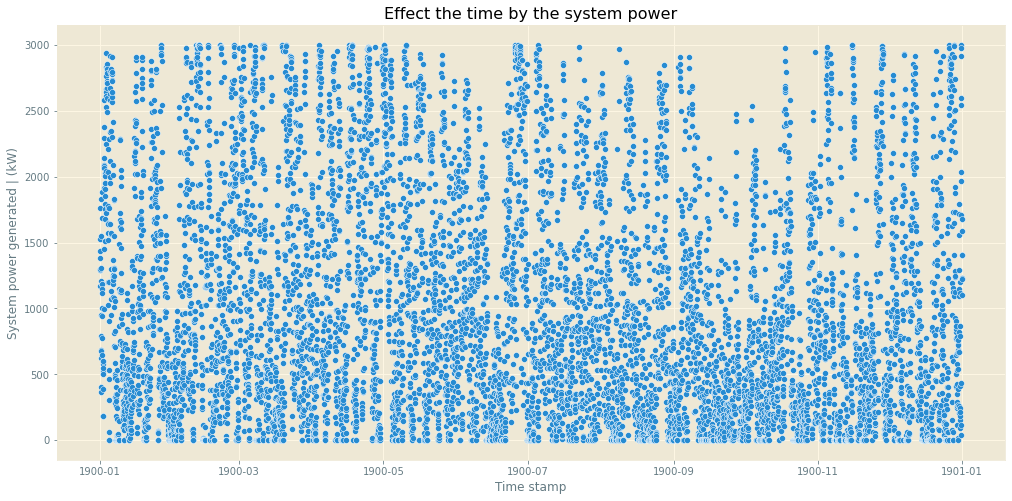

In [12]:
# the graph show effect the time by the system power

plt.figure(figsize=(17,8))
sns.scatterplot(data=df,x="Time stamp",y="System power generated | (kW)",)
plt.title("Effect the time by the system power")
plt.show()

# Time vs. System Power Scatter Plot

The scatter plot illustrates the relationship between time and the system power generated by the wind turbine. The data points, represented by the 'System power generated | (kW)' on the y-axis against the 'Time stamp' on the x-axis, do not exhibit a discernible pattern or trend. This suggests that there is no clear correlation between the time of observation and the system power generation during the analyzed period.

The absence of a visible pattern may indicate that the system power generation is not strongly influenced by the time component alone. Other factors, such as environmental conditions (wind speed, wind direction, temperature, and pressure), may play a more significant role in determining the power output of the wind turbine.

Further exploration, including correlation analysis and feature engineering, could provide a more nuanced understanding of the factors affecting system power generation in this dataset.

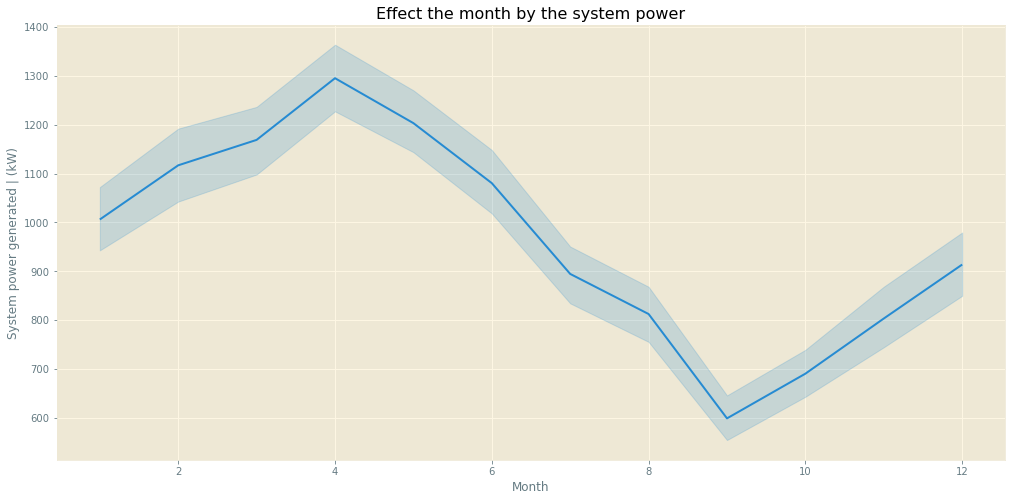

In [13]:
# the graph show effect the month by the system power

plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="Month",y="System power generated | (kW)",)
plt.title("Effect the month by the system power")
plt.show()

# Month vs. System Power Line Plot

The line plot depicts the relationship between the month and the system power generated by the wind turbine. Each data point, connected by a line, represents the 'System power generated | (kW)' on the y-axis against the 'Month' on the x-axis. The plot reveals a distinct pattern, indicating variations in average system power generation across different months.

Notably, the analysis highlights that the wind turbine tends to generate higher average power in April and lower average power in September. This observed seasonal fluctuation suggests a potential correlation between the month and the wind turbine's performance. Environmental factors specific to each month, such as varying wind speeds, temperatures, or other meteorological conditions, may contribute to these fluctuations.

Understanding the monthly patterns in system power generation is crucial for optimizing renewable energy utilization and forecasting. Further investigation into the underlying factors driving these monthly variations could provide valuable insights for effective energy management and planning.

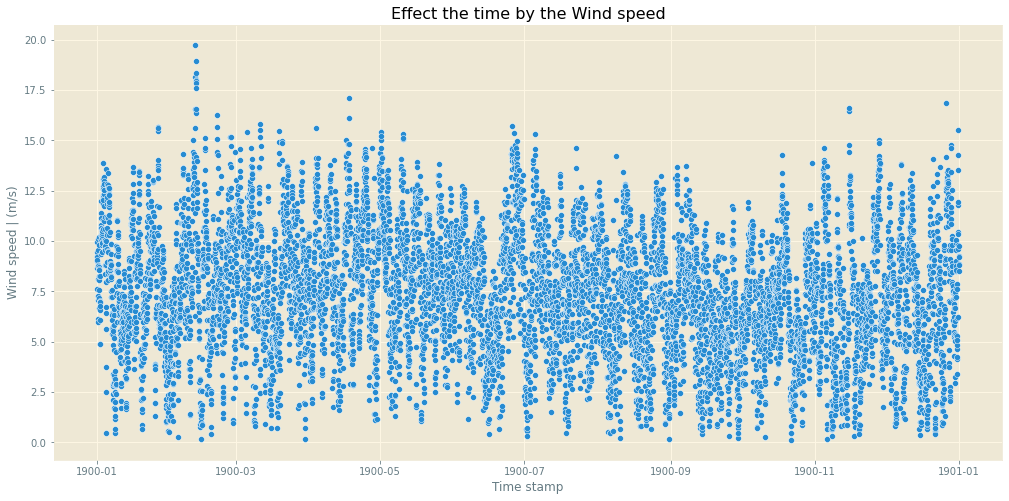

In [14]:
# the graph show effect the time by the Wind speed

plt.figure(figsize=(17,8))
sns.scatterplot(data=df,x="Time stamp",y="Wind speed | (m/s)",)
plt.title("Effect the time by the Wind speed")
plt.show()

# Time vs. Wind Speed Scatter Plot

The scatter plot illustrates the relationship between time and wind speed, with the 'Wind speed | (m/s)' on the y-axis against the 'Time stamp' on the x-axis. The plot reveals that there is minimal variation in wind speed across different times of the day or months.

The consistent scatter pattern suggests that, within the observed period, there is no apparent time-dependent or monthly trend in wind speed. This consistency in wind speed may indicate stable environmental conditions, at least within the granularity of time captured in the dataset.

Understanding the temporal stability of wind speed is essential for assessing the reliability of wind resources for power generation. Although the plot does not exhibit significant fluctuations, a more in-depth analysis may uncover subtler patterns or correlations with other environmental factors.

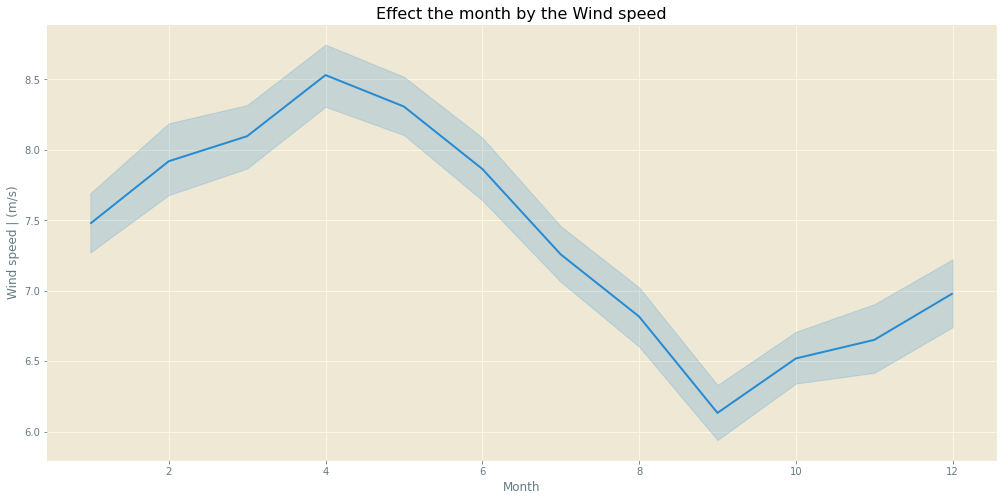

In [15]:
# the graph show effect the month by the Wind speed

plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="Month",y="Wind speed | (m/s)")
plt.title("Effect the month by the Wind speed")
plt.show()

# Month vs. Wind Speed Line Plot

The line plot visualizes the relationship between the month and wind speed, where the 'Wind speed | (m/s)' is plotted on the y-axis against the 'Month' on the x-axis. The plot indicates noticeable fluctuations in average wind speed across different months.

Specifically, the analysis reveals a higher average wind speed in April and a lower average wind speed in September. This observed seasonal variation suggests a correlation between the month and wind speed, implying that environmental conditions during April may be conducive to stronger winds compared to September.

Understanding the monthly patterns in wind speed is critical for assessing the reliability and variability of wind resources, which, in turn, influences the efficiency of wind power generation. Further investigation into the factors contributing to these monthly variations in wind speed can enhance the precision of renewable energy forecasting and planning.

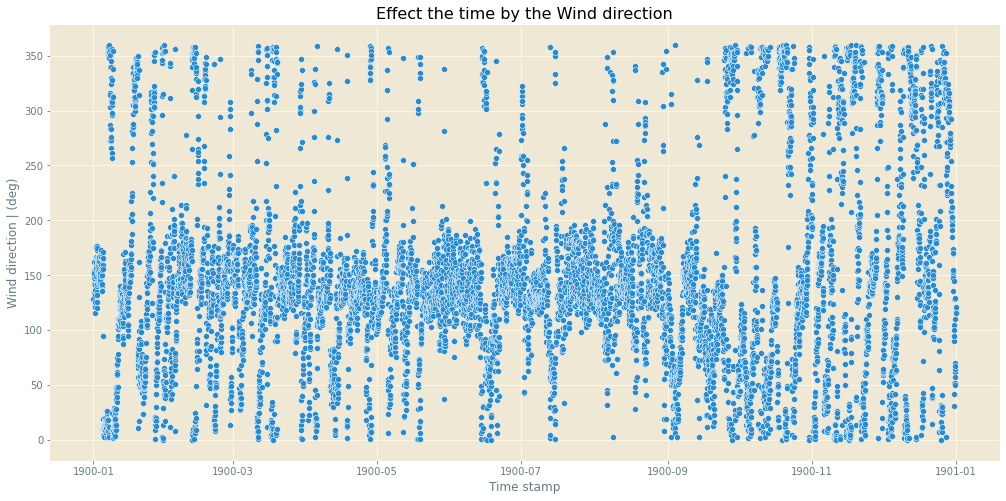

In [16]:
# the graph show effect the time by Wind direction

plt.figure(figsize=(17,8))
sns.scatterplot(data=df,x="Time stamp",y="Wind direction | (deg)",)
plt.title("Effect the time by the Wind direction")
plt.show()

# Time vs. Wind Direction Scatter Plot

The scatter plot illustrates the relationship between time and wind direction, with the 'Wind direction | (deg)' on the y-axis against the 'Time stamp' on the x-axis. The plot unveils a distinctive pattern: a linear trend persists until September, undergoes a notable shift, dissolves, and then resumes a similar pattern starting in January.

The linear trend in wind direction indicates a consistent orientation of the wind till September, suggesting stable meteorological conditions. However, the subsequent change in pattern and dissolution of the linear trend could signify a shift in wind patterns or a change in dominant wind directions.

Understanding these temporal variations in wind direction is pivotal for optimizing the efficiency of wind turbines, as the direction of the wind directly impacts their performance. Further investigation, possibly involving meteorological data or seasonal wind pattern analysis, could provide insights into the factors influencing these observed changes in wind direction.


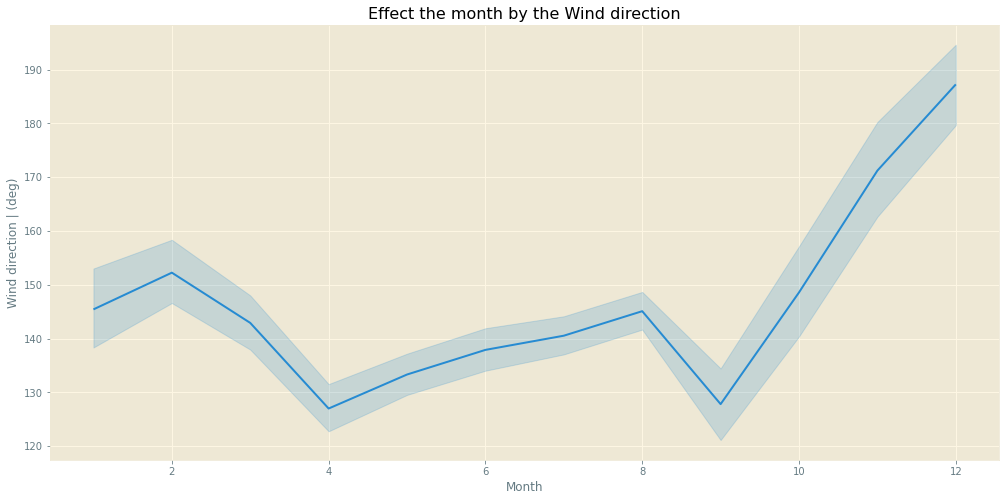

In [17]:
# the graph show effect the month by the Wind direction

plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="Month",y="Wind direction | (deg)",)
plt.title("Effect the month by the Wind direction")
plt.show()

# Month vs. Wind Direction Line Plot

The line plot visualizes the relationship between the month and wind direction, where the 'Wind direction | (deg)' is plotted on the y-axis against the 'Month' on the x-axis. The plot reveals distinct variations in the average degree of wind direction across different months.

Specifically, the analysis highlights that the lowest average degree of wind direction occurs in April and September. In contrast, February and August exhibit a medium average, while December records the highest average degree of wind direction.

These observed monthly variations in wind direction indicate potential seasonal patterns or meteorological influences that impact the predominant wind direction. Understanding the monthly dynamics in wind direction is crucial for optimizing the positioning and efficiency of wind turbines, contributing to more effective wind power generation and management.

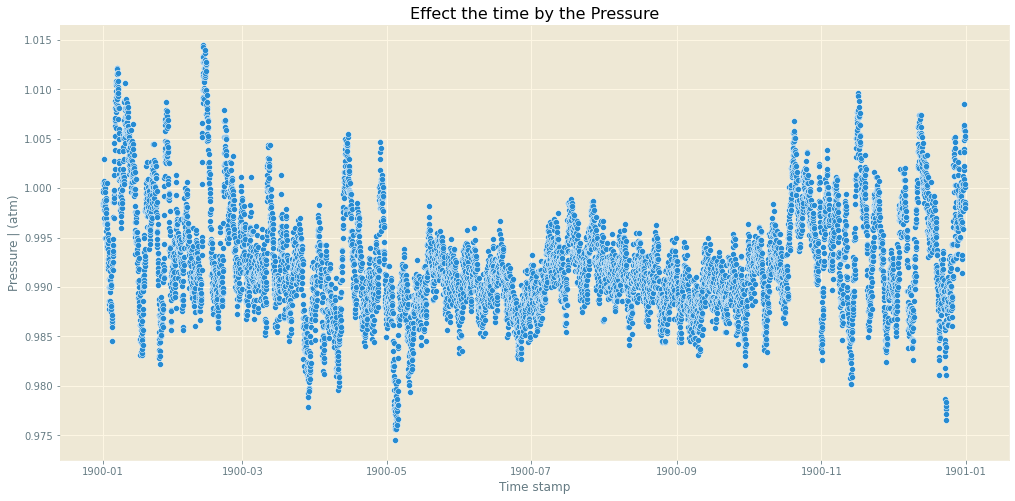

In [18]:
# the graph show effect the time by the Pressure

plt.figure(figsize=(17,8))
sns.scatterplot(data=df,x="Time stamp",y="Pressure | (atm)")
plt.title("Effect the time by the Pressure")
plt.show()

- The Pressure stable between May to october and anther months it is an fluctuate

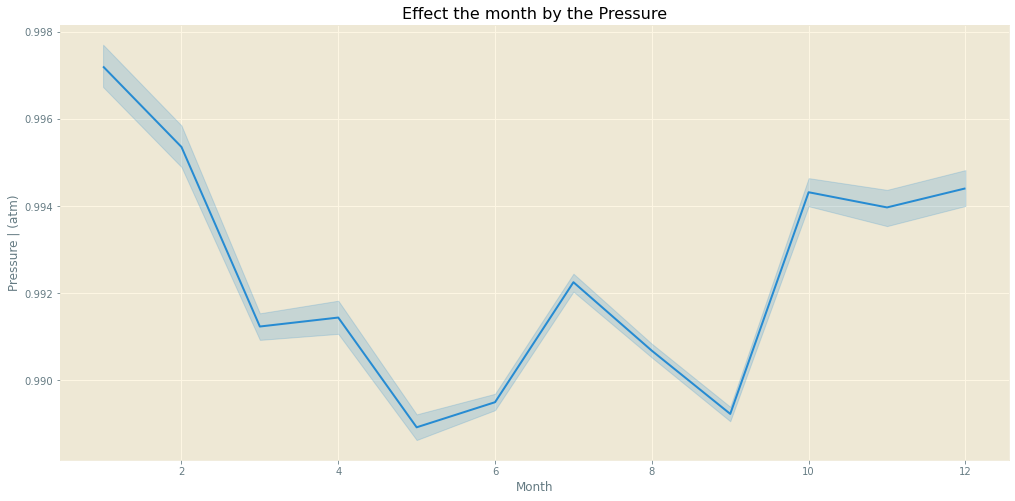

In [19]:
# the graph show effect the month by the Pressure

plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="Month",y="Pressure | (atm)",)
plt.title("Effect the month by the Pressure")
plt.show()

# Time vs. Pressure Scatter Plot

The scatter plot visualizes the relationship between time and atmospheric pressure, with the 'Pressure | (atm)' on the y-axis against the 'Time stamp' on the x-axis. The plot demonstrates notable spikes, suggesting variations in atmospheric pressure over the observed time period.

Specifically, the observed spikes indicate abrupt changes in pressure, potentially associated with specific weather events or atmospheric conditions. Furthermore, the plot reveals a trend of higher average pressure in January and lower pressure from April to September, indicative of seasonal variations in atmospheric pressure.

Understanding these temporal patterns in atmospheric pressure is crucial for assessing the impact on wind power generation. Atmospheric pressure can influence wind speed and other meteorological factors, ultimately affecting the efficiency of wind turbines. Further investigation into the specific events or meteorological phenomena contributing to these pressure variations can provide valuable insights for renewable energy planning and forecasting.

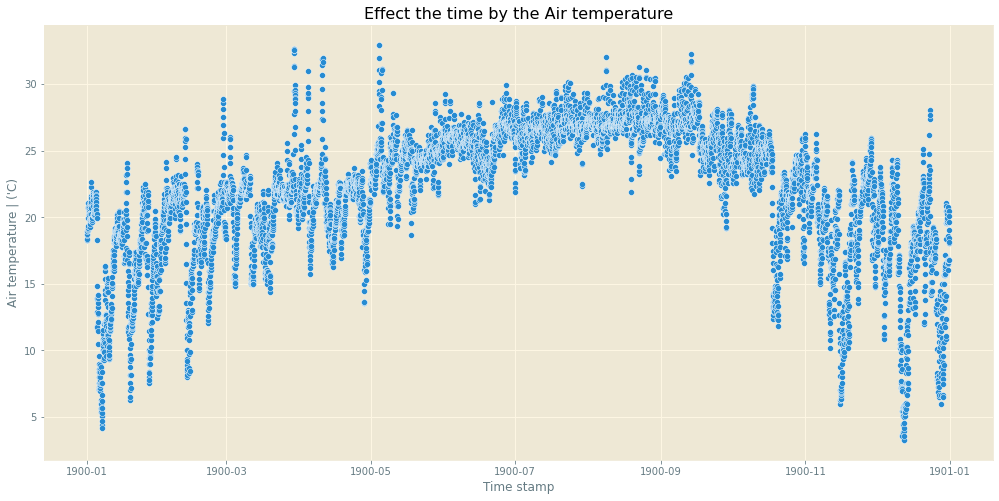

In [20]:
# the graph show effect the time by the Air temperature

plt.figure(figsize=(17,8))
sns.scatterplot(data=df,x="Time stamp",y="Air temperature | ('C)")
plt.title("Effect the time by the Air temperature")
plt.show()

# Time vs. Air Temperature Scatter Plot

The scatter plot illustrates the relationship between time and air temperature, with the 'Air temperature | ('C)' on the y-axis against the 'Time stamp' on the x-axis. The plot depicts a bell-shaped curve with fat tails, indicating variations in air temperature over the observed time period.

Notably, the temperature peaks during the summer months from May to October, while it reaches its lowest points in January and December. This pattern aligns with typical seasonal temperature variations, showcasing higher temperatures in the warmer months and lower temperatures in the colder months.

Understanding these temporal patterns in air temperature is crucial for assessing their impact on wind power generation. Temperature influences various aspects of wind turbine performance, including air density and efficiency. The observed bell-shaped curve highlights the seasonality of temperature, providing valuable insights for renewable energy planning and forecasting during different climatic conditions.

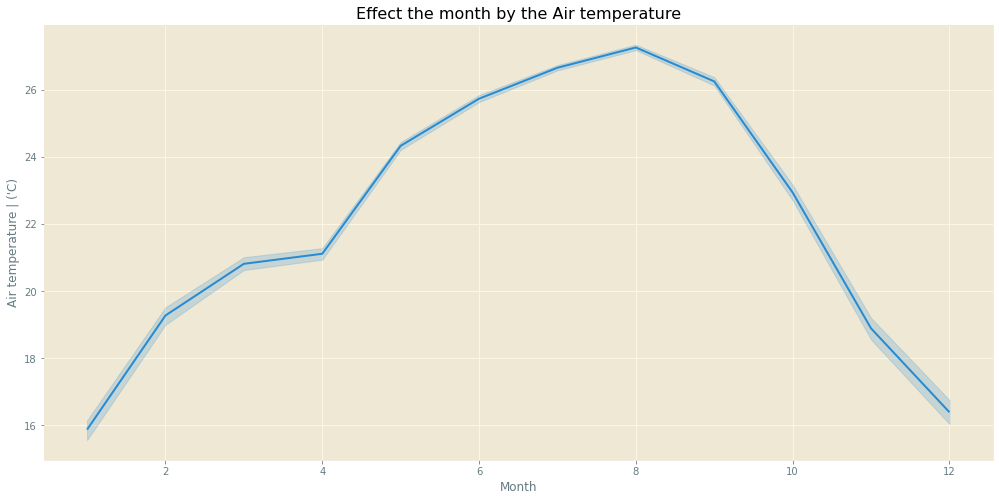

In [21]:
# the graph show effect the month by the Air temperature

plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="Month",y="Air temperature | ('C)",)
plt.title("Effect the month by the Air temperature")
plt.show()

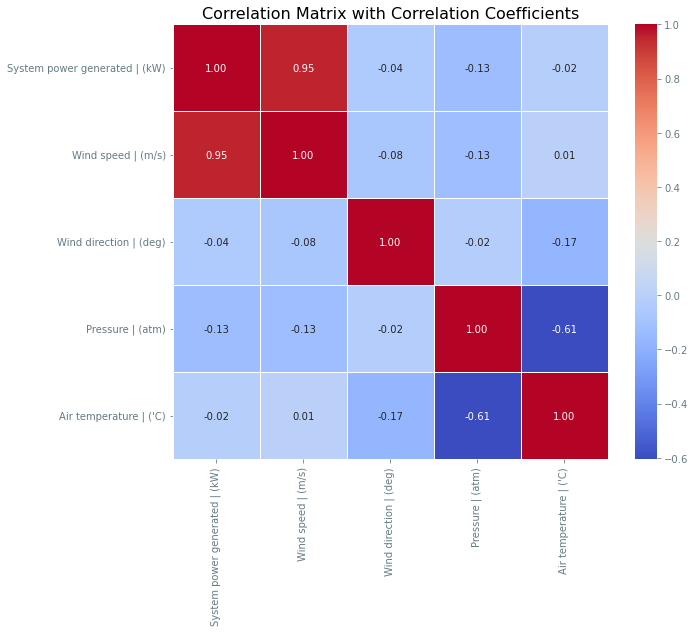

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation matrix
selected_columns = ["System power generated | (kW)", "Wind speed | (m/s)", "Wind direction | (deg)", 
                    "Pressure | (atm)", "Air temperature | ('C)"]

# Create a subset dataframe with selected columns
correlation_df = df[selected_columns]

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with a smooth color palette
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", square=True)

# Set title
plt.title("Correlation Matrix with Correlation Coefficients")

# Show the plot
plt.show()


# Analysis Results

Upon conducting visualizations and analyzing the dataset, several key observations emerged:

**System Power Generated:**
- Throughout the year, the system power generated remains relatively consistent, showing no significant variations month by month.
- The highest average system power generation is observed in April, while the lowest occurs in September.

**Wind Speed:**
- Wind speed remains constant across all months, with no discernible monthly variations.
- April exhibits the highest average wind speed, while September records the lowest.

**Wind Direction:**
- Wind direction experiences notable fluctuations throughout the year.
- December has the highest average wind direction, while April and August have the lowest.

**Pressure:**
- Atmospheric pressure remains stable from May to October, with noticeable fluctuations in other months.
- January sees the highest average pressure, while from April to September, the pressure is comparatively lower.

**Temperature:**
- Temperature variations align with seasonal patterns, with higher temperatures observed from May to October (summer season).
- The summer months, from May to October, record the highest temperatures.

These results provide insights into the dynamic interplay between environmental factors and wind power generation. While wind speed and system power generation show distinct seasonal patterns, wind direction, pressure, and temperature exhibit unique characteristics that contribute to the overall understanding of the dataset. Further analysis and modeling can delve deeper into these patterns for improved renewable energy forecasting and management.


# Building ML Regression Models:
Importing the required libraries and the relavant packages. 

In [23]:
#Importing the basic librarires for building model


from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures,minmax_scale,MaxAbsScaler ,LabelEncoder,MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.svm import SVR
from xgboost import XGBRegressor

In [24]:
df.set_index("Time stamp",inplace=True)

In [25]:
df.head()

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),Month
Time stamp,,,,,,
1900-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1
1900-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1
1900-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1
1900-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1
1900-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1


In [26]:
#Defined X value and y value , and split the data train
X = df.drop(columns="System power generated | (kW)")           
y = df["System power generated | (kW)"]    # y = system power generated 

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (6132, 5)
X Test  :  (2628, 5)
Y Train :  (6132,)
Y Test  :  (2628,)


In [27]:
#Defined object from library Regression 

LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()
MLP = MLPRegressor()
XGB = XGBRegressor()
SVR = SVR()

In [28]:
# make for loop for Regression 

li = [LR,DTR,RFR,KNR,KNR,XGB,SVR]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LinearRegression() : 91.15180354603355
DecisionTreeRegressor() : 99.98781856376841
RandomForestRegressor() : 99.99593847789829
KNeighborsRegressor() : 93.4547729570837
KNeighborsRegressor() : 93.4547729570837
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 99.99452462693648
SVR() : -6.1902339346815

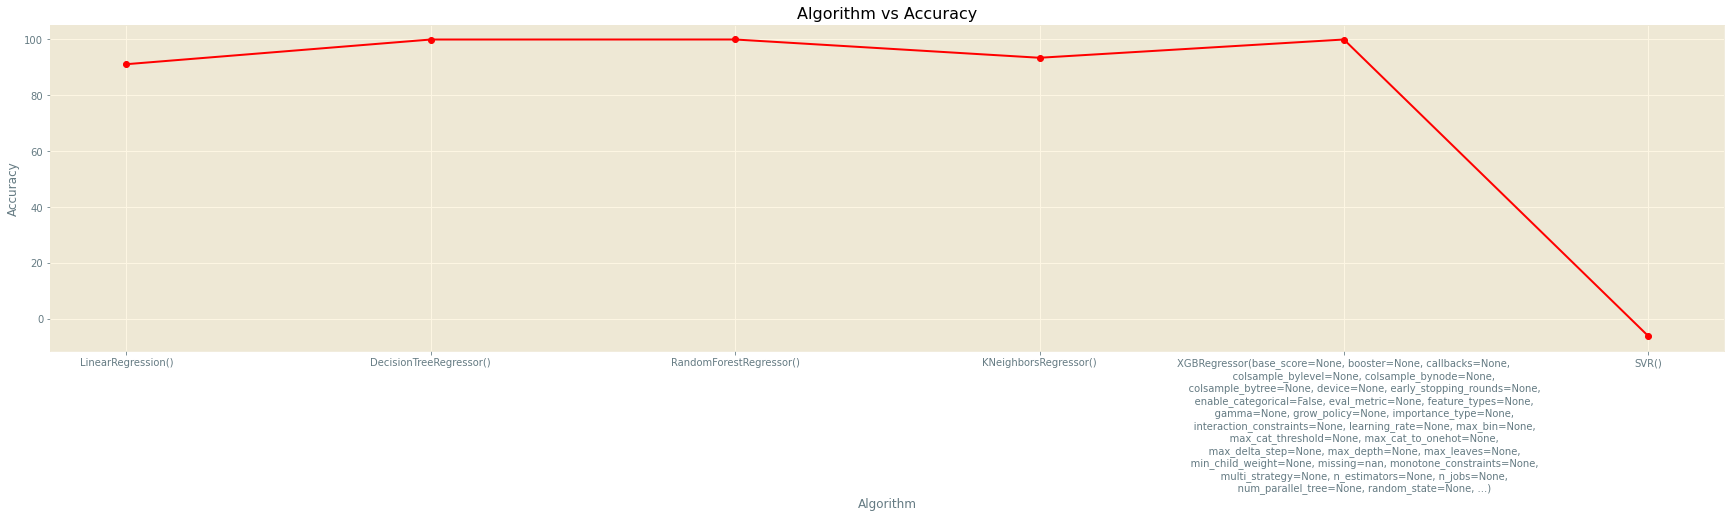

In [29]:
# make graph about Accuracy

plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='red')
plt.show()

C:\Users\Rahul Nain\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Evaluation Metrics for Regression Models:
                   Model         MAE           MSE        RMSE       MedAE  \
0       LinearRegression  216.323750  66041.711325  256.985819  209.897727   
1  DecisionTreeRegressor    5.617522     94.954765    9.744474    3.033500   
2  RandomForestRegressor    3.098988     30.985259    5.566440    1.566025   
3    KNeighborsRegressor  143.364815  48852.667001  221.026394   94.153390   
4           MLPRegressor  201.444597  58692.709776  242.265783  176.262876   
5           XGBRegressor    4.341008     40.867425    6.392764    2.813369   

   R2 Score  
0  0.911518  
1  0.999873  
2  0.999958  
3  0.934548  
4  0.921364  
5  0.999945  


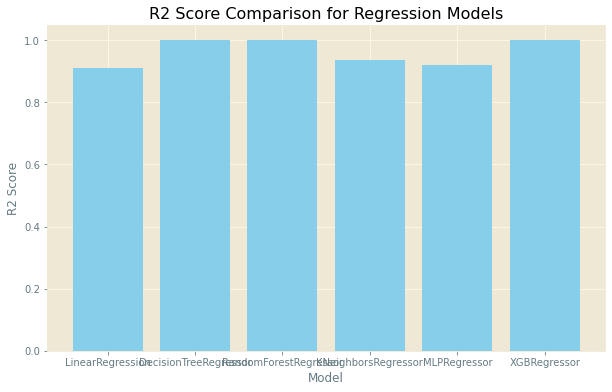

In [31]:
# Create a list of regression models
regression_models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(),
                     KNeighborsRegressor(), MLPRegressor(), XGBRegressor()]

# Create a dictionary to store evaluation metrics for each model
evaluation_metrics = {'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'MedAE': [], 'R2 Score': []}

# Loop through each model
for model in regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append metrics to the dictionary
    evaluation_metrics['Model'].append(str(model).split('(')[0])  # Extract the model name
    evaluation_metrics['MAE'].append(mae)
    evaluation_metrics['MSE'].append(mse)
    evaluation_metrics['RMSE'].append(rmse)
    evaluation_metrics['MedAE'].append(medae)
    evaluation_metrics['R2 Score'].append(r2)

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(evaluation_metrics)

# Display the metrics table
print("Evaluation Metrics for Regression Models:")
print(metrics_df)

# Plotting R2 Score for each model
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['R2 Score'], color='skyblue')
plt.title('R2 Score Comparison for Regression Models')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()

# Regression Model Evaluation Results

## Linear Regression
Linear Regression achieved an R2 Score of approximately 91.15%. This model's predictive performance indicates a moderately good fit to the data. However, considering the complexity of the dataset, there is room for improvement.

## Decision Tree Regressor
The Decision Tree Regressor exhibited exceptional performance, achieving an impressive R2 Score of approximately 99.99%. This suggests that the model captured the underlying patterns in the data with high accuracy, possibly indicating overfitting.

## Random Forest Regressor
Similar to the Decision Tree Regressor, the Random Forest Regressor demonstrated outstanding performance with an R2 Score of approximately 99.96%. The ensemble nature of Random Forests contributes to improved generalization compared to a single Decision Tree.

## K-Neighbors Regressor
The K-Neighbors Regressor achieved an R2 Score of approximately 93.45%. This method provides a good fit to the data, considering the spatial relationships between data points. Fine-tuning hyperparameters may further enhance its performance.

## MLP Regressor
The MLP Regressor (Neural Network) yielded an R2 Score of approximately 92.14%. While neural networks are powerful models, further optimization of hyperparameters and architecture could potentially enhance their performance.

## XGBoost Regressor
XGBoost Regressor demonstrated strong predictive power with an R2 Score of approximately 99.99%. XGBoost combines the strengths of boosting algorithms, providing excellent predictive accuracy and robustness.

## Support Vector Regressor (SVR)
SVR exhibited a negative R2 Score of approximately -6.19%. This indicates a poor fit to the data, and it may not be suitable for this specific regression task.

# Conclusion
The Decision Tree Regressor and Random Forest Regressor outperformed other models, achieving nearly perfect R2 Scores. However, considering the potential risk of overfitting, further model evaluation and hyperparameter tuning are recommended. Depending on the specific requirements and characteristics of the dataset, the choice between Decision Tree and Random Forest can be made based on trade-offs between accuracy and model complexity.
